# Project 3 : Battle of the Dating Apps
## CoffeeMeetsBagel v.s. OKCupid 

#### Differentiating subreddit posts between `r/coffeemeetsbagel` and `r/OkCupid` using Natual Language Processing.

## Problem Statement 

Some of the most downloaded dating apps include Tinder, Bumble, CoffeeMeetsBagel, OkCupid etc. Ever since the advent of dating apps, dating service companies have been trying to outdo each other in terms of app subscribtions, as well as onboarding premium subscribers. Especially over the past few years, we have seen an influx of more dating apps which offers comparably different matching methodologies and algorithms. According to statistia.com, revenue in the online dating segments amounts to around 1.7 billion USD per year, with a projected annual growth rate of 9.3% in the next 3 years. 

The onling dating apps industry still proves to be a popular investment choice for both venture capitalists and angel investors. Our clients, Venus Dating Pte Ltd, is a new start-up that seeks to penetrate into the dating app scene and has hired us as data science consultants to conduct basic data anaylsis on their competitors.

For a start, our team is focusing on two companies for the inital research, CoffeeMeetsBagel and OkCupid. We plan to scrape data from reddit, a popular online forum where netizens gather to discuss about the latest social news and trends. In this instance, reddit would be the perfect platform to find out what people's perception of these dating apps are. Natural Language Processing will be used to analyse the posts, and a model will be built to classify posts form the two different apps, using key words as the features in the model. 

It is important to identify key trending words and phrases in these subreddit posts for dating apps, as the general themes of discussion can give us key insights on how people perceive an online dating site to be. Furthermore, we would want to build a classifier using these key words as features of model, in order to verify whether the words are indeed representative of themes revolving around a dating app. The **accuracy score** would be used to determine the performance of the classifier model. 

Sources from:
https://www.statista.com/outlook/372/100/online-dating/worldwide

## Contents 
1. [Web Scraping](#web_scraping)
2. [Data Cleaning and Formatting](#dataclean)
3. [Identifying Key Features (Words)](#keywords)
4. [Modelling](#modelling)
5. [Conclusion and Recommendations](#conclusion)

In [1]:
#Imports:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)
sns.set_style("whitegrid")

import requests
import time
import random

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

<a id='web_scraping'></a>
## 1. Web Scraping 
---

### Collecting Data from `r/coffeemeetsbagel`

In [2]:
url = 'https://www.reddit.com/r/coffeemeetsbagel.json'

# Requesting data from r/coffeemeets bagel. Header set to prevent 429 error 
res_cmb = requests.get(url, headers={'User-agent': 'CMB 1.0'})
res_cmb.status_code

200

In [3]:
# Scrapping data for CoffeeMeetsBagel in .json format
cmb_dict = res_cmb.json()
cmb_dict

{'kind': 'Listing',
 'data': {'modhash': '',
  'dist': 26,
  'children': [{'kind': 't3',
    'data': {'approved_at_utc': None,
     'subreddit': 'coffeemeetsbagel',
     'selftext': "For any questions about how the app works, please refer to: [https://coffeemeetsbagel.zendesk.com/hc/en-us](https://coffeemeetsbagel.zendesk.com/hc/en-us) \n\nIf you can't find an answer to your inquiry in the Help Center, please email contact@coffeemeetsbagel.com",
     'author_fullname': 't2_59aare',
     'saved': False,
     'mod_reason_title': None,
     'gilded': 0,
     'clicked': False,
     'title': 'CMB Help Center',
     'link_flair_richtext': [],
     'subreddit_name_prefixed': 'r/coffeemeetsbagel',
     'hidden': False,
     'pwls': 6,
     'link_flair_css_class': None,
     'downs': 0,
     'thumbnail_height': None,
     'hide_score': False,
     'name': 't3_cth9ox',
     'quarantine': False,
     'link_flair_text_color': 'dark',
     'upvote_ratio': 0.84,
     'author_flair_background_color':

In [4]:
len(cmb_dict['data']['children'])

26

### Scraping Data from Reddit API for `r/coffeemeetsbagel`

In [5]:
cmb_posts = []
after = None

for a in range(40):
    if after == None:
        current_url = url
    else:
        current_url = url + '?after=' + after
    print(current_url)
    res = requests.get(current_url, headers={'User-agent': 'CMB 1.0'})
    
    if res.status_code != 200:
        print('Status error', res.status_code)
        break
    
    current_dict = res.json()
    current_posts = [p['data'] for p in current_dict['data']['children']]
    print('No of posts:' + str(len(current_posts)))
    cmb_posts.extend(current_posts)
    after = current_dict['data']['after']

    time.sleep(1) # your program sleeps for the sleep_duration

https://www.reddit.com/r/coffeemeetsbagel.json
No of posts:26
https://www.reddit.com/r/coffeemeetsbagel.json?after=t3_gevanl
No of posts:25
https://www.reddit.com/r/coffeemeetsbagel.json?after=t3_g6aso1
No of posts:25
https://www.reddit.com/r/coffeemeetsbagel.json?after=t3_fxgt22
No of posts:25
https://www.reddit.com/r/coffeemeetsbagel.json?after=t3_fpgcob
No of posts:25
https://www.reddit.com/r/coffeemeetsbagel.json?after=t3_ffqrs5
No of posts:25
https://www.reddit.com/r/coffeemeetsbagel.json?after=t3_f6ncfz
No of posts:25
https://www.reddit.com/r/coffeemeetsbagel.json?after=t3_ew35bv
No of posts:25
https://www.reddit.com/r/coffeemeetsbagel.json?after=t3_en1gbe
No of posts:25
https://www.reddit.com/r/coffeemeetsbagel.json?after=t3_ehx871
No of posts:25
https://www.reddit.com/r/coffeemeetsbagel.json?after=t3_e8yiwh
No of posts:25
https://www.reddit.com/r/coffeemeetsbagel.json?after=t3_dz4smb
No of posts:25
https://www.reddit.com/r/coffeemeetsbagel.json?after=t3_djuddl
No of posts:25
ht

In [6]:
len(cmb_posts)

982

### Converting scrapped data from .json into .csv

In [7]:
pd.DataFrame(cmb_posts).to_csv('datasets/cmb_posts.csv', index = False)

In [8]:
cmb_df_full = pd.read_csv('datasets/cmb_posts.csv')

In [9]:
cmb_df_full.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,downs,thumbnail_height,hide_score,name,quarantine,link_flair_text_color,upvote_ratio,author_flair_background_color,subreddit_type,ups,total_awards_received,media_embed,thumbnail_width,author_flair_template_id,is_original_content,user_reports,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,can_mod_post,score,approved_by,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,post_hint,content_categories,is_self,mod_note,created,...,likes,suggested_sort,banned_at_utc,view_count,archived,no_follow,is_crosspostable,pinned,over_18,preview,all_awardings,awarders,media_only,can_gild,spoiler,locked,author_flair_text,treatment_tags,visited,removed_by,num_reports,distinguished,subreddit_id,mod_reason_by,removal_reason,link_flair_background_color,id,is_robot_indexable,report_reasons,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,mod_reports,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,media_metadata,crosspost_parent_list,crosspost_parent
0,NaN,coffeemeetsbagel,"For any questions about how the app works, ple...",t2_59aare,False,NaN,0,False,CMB Help Center,[],r/coffeemeetsbagel,False,6,NaN,0,NaN,False,t3_cth9ox,False,dark,1.00,NaN,public,5,0,{},NaN,NaN,False,[],NaN,False,False,NaN,{},NaN,False,5,NaN,False,self,False,NaN,[],{},self,NaN,True,NaN,1.566425e+09,...,NaN,NaN,NaN,NaN,True,False,False,False,False,{'images': [{'source': {'url': 'https://extern...,[],[],False,False,False,False,CMB Official,[],False,NaN,NaN,NaN,t5_31nwe,NaN,NaN,NaN,cth9ox,True,NaN,CoffeeMeetsBagelCS,NaN,5,True,all_ads,False,[],False,dark,/r/coffeemeetsbagel/comments/cth9ox/cmb_help_c...,all_ads,True,https://www.reddit.com/r/coffeemeetsbagel/comm...,7321,1.566396e+09,0,NaN,False,NaN,NaN,NaN
1,NaN,coffeemeetsbagel,"If you're interested in reviewing a profile, D...",t2_l3n9e,False,NaN,0,False,28M Profile Review,[],r/coffeemeetsbagel,False,6,NaN,0,NaN,False,t3_gl88kp,False,dark,1.00,NaN,public,4,0,{},NaN,NaN,False,[],NaN,False,False,NaN,{},NaN,False,4,NaN,False,self,1589688318.0,NaN,[],{},NaN,NaN,True,NaN,1.589714e+09,...,NaN,NaN,NaN,NaN,False,True,False,False,False,NaN,[],[],False,False,False,False,NaN,[],False,NaN,NaN,NaN,t5_31nwe,NaN,NaN,NaN,gl88kp,True,NaN,PFSGTA,NaN,3,True,all_ads,False,[],False,NaN,/r/coffeemeetsbagel/comments/gl88kp/28m_profil...,all_ads,False,https://www.reddit.com/r/coffeemeetsbagel/comm...,7321,1.589685e+09,0,NaN,False,NaN,NaN,NaN
2,NaN,coffeemeetsbagel,i mean $35 a month is kinda $$$ for me but con...,t2_1426se,False,NaN,0,False,has anyone paid for premium and whats your exp...,[],r/coffeemeetsbagel,False,6,NaN,0,NaN,False,t3_gkzxeu,False,dark,0.81,NaN,public,3,0,{},NaN,NaN,False,[],NaN,False,False,NaN,{},NaN,False,3,NaN,False,self,False,NaN,[],{},NaN,NaN,True,NaN,1.589684e+09,...,NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,[],[],False,False,False,False,NaN,[],False,NaN,NaN,NaN,t5_31nwe,NaN,NaN,NaN,gkzxeu,True,NaN,amiinarightplace,NaN,5,True,all_ads,False,[],False,NaN,/r/coffeemeetsbagel/comments/gkzxeu/has_anyone...,all_ads,False,https://www.reddit.com/r/coffeemeetsbagel/comm...,7321,1.589655e+09,0,NaN,False,NaN,NaN,NaN
3,NaN,coffeemeetsbagel,So I've been trying out the app for around a w...,t2_2ubopqol,False,NaN,0,False,How are matches supposed to work?,[],r/coffeemeetsbagel,False,6,NaN,0,NaN,False,t3_gkt67t,False,dark,1.00,NaN,public,4,0,{},NaN,NaN,False,[],NaN,False,False,NaN,{},NaN,False,4,NaN,False,self,False,NaN,[],{},NaN,NaN,True,NaN,1.589657e+09,...,NaN,NaN,NaN,NaN,False,True,False,False,False,NaN,[],[],False,False,False,False,NaN,[],False,NaN,NaN,NaN,t5_31nwe,NaN,NaN,NaN,gkt67t,True,NaN,DiscombobulatedYou5,NaN,2,True,all_ads,False,[],False,NaN,/r/cof

In [10]:
# Only retain columns name, title, selftext and subreddit 
cmb_df = cmb_df_full[['name','title','selftext','subreddit']]
cmb_df.head()

,name,title,selftext,subreddit
0,t3_cth9ox,CMB Help Center,"For any questions about how the app works, ple...",coffeemeetsbagel
1,t3_gl88kp,28M Profile Review,"If you're interested in reviewing a profile, D...",coffeemeetsbagel
2,t3_gkzxeu,has anyone paid for premium and whats your exp...,i mean $35 a month is kinda $$$ for me but con...,coffeemeetsbagel
3,t3_gkt67t,How are matches supposed to work?,So I've been trying out the app for around a w...,coffeemeetsbagel
4,t3_gkma07,Only 1 suggested bagel each day!?,I've just returned to this app after a long hi...,coffeemeetsbagel


### Collecting Data from `r/okc`

In [11]:
url = 'https://www.reddit.com/r/OkCupid.json'

# Requesting data from r/okc. Header set to prevent 429 error 
res_okc = requests.get(url, headers={'User-agent': 'okc 1.0'})
res_okc.status_code

200

In [12]:
# Creating scrapped data for OkCupid in .json format
okc_dict = res_okc.json()
okc_dict

{'kind': 'Listing',
 'data': {'modhash': '',
  'dist': 25,
  'children': [{'kind': 't3',
    'data': {'approved_at_utc': None,
     'subreddit': 'OkCupid',
     'selftext': '',
     'author_fullname': 't2_40bf9046',
     'saved': False,
     'mod_reason_title': None,
     'gilded': 0,
     'clicked': False,
     'title': 'All the seasoning is gone',
     'link_flair_richtext': [],
     'subreddit_name_prefixed': 'r/OkCupid',
     'hidden': False,
     'pwls': 6,
     'link_flair_css_class': None,
     'downs': 0,
     'thumbnail_height': 140,
     'hide_score': False,
     'name': 't3_gkyfmc',
     'quarantine': False,
     'link_flair_text_color': 'dark',
     'upvote_ratio': 0.89,
     'author_flair_background_color': None,
     'subreddit_type': 'public',
     'ups': 489,
     'total_awards_received': 0,
     'media_embed': {},
     'thumbnail_width': 140,
     'author_flair_template_id': None,
     'is_original_content': False,
     'user_reports': [],
     'secure_media': None,
  

In [13]:
okc_posts = []
after = None

for a in range(40):
    if after == None:
        current_url = url
    else:
        current_url = url + '?after=' + after
    print(current_url)
    res = requests.get(current_url, headers={'User-agent': 'okc 1.0'})
    
    if res.status_code != 200:
        print('Status error', res.status_code)
        break
    
    current_dict = res.json()
    current_posts = [p['data'] for p in current_dict['data']['children']]
    print('No of posts:' + str(len(current_posts)))
    okc_posts.extend(current_posts)
    after = current_dict['data']['after']

    time.sleep(1) # your program sleeps for the sleep_duration

https://www.reddit.com/r/OkCupid.json
No of posts:25
https://www.reddit.com/r/OkCupid.json?after=t3_gkd2zo
No of posts:25
https://www.reddit.com/r/OkCupid.json?after=t3_gju6l1
No of posts:25
https://www.reddit.com/r/OkCupid.json?after=t3_gizs2v
No of posts:25
https://www.reddit.com/r/OkCupid.json?after=t3_ghwxmb
No of posts:25
https://www.reddit.com/r/OkCupid.json?after=t3_gh3x21
No of posts:25
https://www.reddit.com/r/OkCupid.json?after=t3_gg4uwt
No of posts:25
https://www.reddit.com/r/OkCupid.json?after=t3_gf1xch
No of posts:25
https://www.reddit.com/r/OkCupid.json?after=t3_ge9jjs
No of posts:25
https://www.reddit.com/r/OkCupid.json?after=t3_gd1gsl
No of posts:25
https://www.reddit.com/r/OkCupid.json?after=t3_gccv5h
No of posts:25
https://www.reddit.com/r/OkCupid.json?after=t3_gbo73h
No of posts:25
https://www.reddit.com/r/OkCupid.json?after=t3_gai081
No of posts:25
https://www.reddit.com/r/OkCupid.json?after=t3_g9olzr
No of posts:25
https://www.reddit.com/r/OkCupid.json?after=t3_g80

In [14]:
pd.DataFrame(okc_posts).to_csv('datasets/okc_posts.csv', index = False)

In [15]:
okc_df_full = pd.read_csv('datasets/okc_posts.csv')

In [16]:
okc_df_full.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,downs,thumbnail_height,hide_score,name,quarantine,link_flair_text_color,upvote_ratio,author_flair_background_color,subreddit_type,ups,total_awards_received,media_embed,thumbnail_width,author_flair_template_id,is_original_content,user_reports,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,can_mod_post,score,approved_by,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,post_hint,content_categories,is_self,mod_note,created,...,view_count,archived,no_follow,is_crosspostable,pinned,over_18,preview,all_awardings,awarders,media_only,can_gild,spoiler,locked,author_flair_text,treatment_tags,visited,removed_by,num_reports,distinguished,subreddit_id,mod_reason_by,removal_reason,link_flair_background_color,id,is_robot_indexable,report_reasons,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,mod_reports,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,crosspost_parent_list,crosspost_parent,poll_data,media_metadata,author_cakeday,link_flair_template_id
0,NaN,OkCupid,NaN,t2_40bf9046,False,NaN,0,False,All the seasoning is gone,[],r/OkCupid,False,6,NaN,0,140.0,False,t3_gkyfmc,False,dark,0.89,NaN,public,486,0,{},140.0,NaN,False,[],NaN,True,False,NaN,{},NaN,False,486,NaN,False,https://b.thumbs.redditmedia.com/5fcLlrfufiJr4...,False,NaN,[],{},image,NaN,False,NaN,1.589679e+09,...,NaN,False,False,False,False,False,{'images': [{'source': {'url': 'https://previe...,[],[],False,False,False,False,NaN,[],False,NaN,NaN,NaN,t5_2rct2,NaN,NaN,NaN,gkyfmc,True,NaN,religioulislous,NaN,46,True,all_ads,False,[],False,NaN,/r/OkCupid/comments/gkyfmc/all_the_seasoning_i...,all_ads,False,https://i.redd.it/oqq4599av5z41.png,199758,1.589650e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,OkCupid,NaN,t2_4vfb1qqz,False,NaN,0,False,Obnoxiously judgmental or eerily accurate?,[],r/OkCupid,False,6,NaN,0,140.0,False,t3_gl5ngb,False,dark,0.87,NaN,public,6,0,{},140.0,NaN,False,[],NaN,True,False,NaN,{},NaN,False,6,NaN,False,https://b.thumbs.redditmedia.com/e9OsaDfLAkxTO...,False,NaN,[],{},image,NaN,False,NaN,1.589704e+09,...,NaN,False,False,False,False,False,{'images': [{'source': {'url': 'https://previe...,[],[],False,False,False,False,NaN,[],False,NaN,NaN,NaN,t5_2rct2,NaN,NaN,NaN,gl5ngb,True,NaN,FastMaize,NaN,6,True,all_ads,False,[],False,NaN,/r/OkCupid/comments/gl5ngb/obnoxiously_judgmen...,all_ads,False,https://i.redd.it/xe2onqlxy7z41.jpg,199758,1.589675e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,OkCupid,NaN,t2_5nwh1kf5,False,NaN,0,False,Well....,[],r/OkCupid,False,6,NaN,0,125.0,False,t3_gkcx1i,False,dark,0.99,NaN,public,1067,0,{},140.0,NaN,False,[],NaN,True,False,NaN,{},NaN,False,1067,NaN,False,https://a.thumbs.redditmedia.com/OjOMJC2iu6jKZ...,False,NaN,[],{},image,NaN,False,NaN,1.589591e+09,...,NaN,False,False,False,False,False,{'images': [{'source': {'url': 'https://previe...,[],[],False,False,False,False,NaN,[],False,NaN,NaN,NaN,t5_2rct2,NaN,NaN,NaN,gkcx1i,True,NaN,SedPotat,NaN,80,False,all_ads,False,[],False,NaN,/r/OkCupid/comments/gkcx1i/well/,all_ads,False,https://i.redd.it/g85mqfsopwy41.jpg,199758,1.589562e+09,0,NaN,False,"[{'approved_at_utc': None, 'subreddit': 'techn...",t3_gk6p4e,NaN,NaN,NaN,NaN
3,NaN,OkCupid,I've been talking to this guy for about a week...,t2_14lv5al4,False,NaN,0,False,Am I being overly sensitive?,[],r/OkCupid,False,6,NaN,0,NaN,False,t3_gl011a,False,dark,0.92,NaN,public,11,0,{},NaN,NaN,False,[],NaN,False,False,NaN,{},NaN,False,11,NaN,False,self,1589659317.0,NaN,[],{},NaN,NaN,True,NaN,1.589684e+09,...,NaN,False,True,False,False,False,NaN,[],[],False,False,False,False,NaN,[],False,NaN,NaN,NaN,t5_2rct2,NaN,NaN,NaN,gl011a,True,NaN,deadviolets,NaN,10,True,all_ads,False

In [17]:
# Only retain columns name, title, selftext and subreddit 
okc_df = okc_df_full[['name','title','selftext','subreddit']]
okc_df.head()

,name,title,selftext,subreddit
0,t3_gkyfmc,All the seasoning is gone,NaN,OkCupid
1,t3_gl5ngb,Obnoxiously judgmental or eerily accurate?,NaN,OkCupid
2,t3_gkcx1i,Well....,NaN,OkCupid
3,t3_gl011a,Am I being overly sensitive?,I've been talking to this guy for about a week...,OkCupid
4,t3_glan23,A list? Is it worth it?,I’d like to just do a search for answers to a ...,OkCupid


<a id='dataclean'></a>
## 2. Data Cleaning and Formatting 
---

#### Checking for dataframe shapes, types, null values etc.

In [18]:
cmb_df.shape

(982, 4)

In [19]:
okc_df.shape

(988, 4)

In [20]:
cmb_df.dtypes

name         object
title        object
selftext     object
subreddit    object
dtype: object

In [21]:
okc_df.dtypes

name         object
title        object
selftext     object
subreddit    object
dtype: object

In [22]:
cmb_df.isnull().sum()

name           0
title          0
selftext     107
subreddit      0
dtype: int64

In [23]:
okc_df.isnull().sum()

name           0
title          0
selftext     550
subreddit      0
dtype: int64

#### Replace null values with empty string

In [24]:
# Replace null texts with empty string
cmb_df.selftext.fillna(value='', inplace=True)

C:\Users\yingh\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [25]:
okc_df.selftext.fillna(value='', inplace=True)

In [26]:
cmb_df.isnull().sum()

name         0
title        0
selftext     0
subreddit    0
dtype: int64

In [27]:
okc_df.isnull().sum()

name         0
title        0
selftext     0
subreddit    0
dtype: int64

<a id='keywords'></a>
## 3. Identifying Key Features (Words)
---

### Creating WordCloud Function

In [28]:
# Import library for generating word cloud
from wordcloud import WordCloud
from PIL import Image

# Define function to draw word cloud
def wordcloud(text, plot_title=None, mask_img=None):
    """
    Generate and draw word cloud from text.
    
    Parameters
    ----------
    text : str
        Text to generate word cloud from.
    title : str
        Title to set on plot
    mask_img: str
        Path to image mask
    """
    mask = np.array(Image.open(mask_img))

    wordcloud = WordCloud(
        mask = mask,
        scale=7,
        max_words=1000,
        background_color='white',
        colormap='brg',
        contour_width=3,
        contour_color='steelblue',
        random_state=42
    ).generate(text)
    plt.figure(figsize=(14,14), facecolor='white')
    plt.imshow(wordcloud, interpolation="bilinear")
    if plot_title:
        plt.title(plot_title, fontsize=20, pad=50)
    plt.axis("off")
    plt.show()

In [29]:
len(cmb_df['title'])

982

In [30]:
text = []

text.append(cmb_df['selftext'][0])
text.append(cmb_df['title'][1])

text

["For any questions about how the app works, please refer to: [https://coffeemeetsbagel.zendesk.com/hc/en-us](https://coffeemeetsbagel.zendesk.com/hc/en-us) \n\nIf you can't find an answer to your inquiry in the Help Center, please email contact@coffeemeetsbagel.com",
 '28M Profile Review']

In [31]:
def word_chunk(title, selftext):
    
    """
    Captures words from subreddit posts in both titles and selftext and combines them into a list.
    
    Parameters
    ----------
    title : str
        Title from subreddit posts 
    selftext: str
        Selftext from subreddit posts 
    """

    titletext = []
    selftext = []
    for num in range(len(title)):
        titletext.append(title[num])
    for num in range(len(selftext)):
        selftext.append(selftext[num]) 
    
    text_combined = titletext + selftext
    
    return text_combined

In [32]:
cmb_wordchunk = word_chunk(cmb_df['title'],cmb_df['selftext'])
cmb_wordchunk

['CMB Help Center',
 '28M Profile Review',
 'has anyone paid for premium and whats your experience?',
 'How are matches supposed to work?',
 'Only 1 suggested bagel each day!?',
 'flowers to jump the queue',
 'How to unblock my phone number and log into my account?',
 'Deleting my account',
 'Accidentally created another profile',
 'After not texting for a week, should I find him after we both kinda flaked on our first date?',
 'Discover Tab broken?',
 'So you want to charge me more than Netflix to tell me if someone read a damn message?',
 'F28 with only three matches in a month',
 'Has anyone received this from CMB in a chat: [Name] told us she’s open to trying a date with you. Virtual dates may sound unusual at first. But with in-person dates on pause, now’s a great time to try something new together...”',
 'Is everybody getting lots of Suggested bagels right now?',
 "Some profiles I've encountered in the past have appeared in my suggestions list again?",
 'Extended Chat Help',
 'Fi

In [33]:
okc_wordchunk = word_chunk(okc_df['title'],okc_df['selftext'])
okc_wordchunk

['All the seasoning is gone',
 'Obnoxiously judgmental or eerily accurate?',
 'Well....',
 'Am I being overly sensitive?',
 'A list? Is it worth it?',
 'Did they just reduce the daily like limit or something?',
 "Is 'you like' feature gone?",
 "I'm starting to lose hope of ever finding love",
 'Please help - billing',
 '[cj] What are you doing tonight?',
 "White Supremacists Built a Website to Doxx Interracial Couples — and It's Going to Be Hard to Take Down",
 "Think I found 'the one' guys!",
 '[cj] What’s your favorite seasoning?',
 'Selfie Saturday - May 16, 2020',
 'Need an advice',
 'Comic.',
 'Search feature gone?',
 '6 Finger Vibrators so You Can Avoid That Terrible Hand Cramp Thing',
 'When Healthy Love Is Foreign, At First It Can Feel...',
 'what is the best dating app or website?',
 'Feeling weird because a girl I met on OkCupid died',
 "Trigger warning slurs, hate speech, homophobia, how can I stop getting messaged like this? Reporting doesn't work",
 '[cj] What are you doin

#### Removing stop words from both subreddit posts 

In [34]:
from bs4 import BeautifulSoup  
import re

#### Creating soup objects from strings

In [35]:
# Initialize the BeautifulSoup object on a single movie review     
cmb_wordchunk_soup = BeautifulSoup(str(cmb_wordchunk))
okc_wordchunk_soup = BeautifulSoup(str(okc_wordchunk))

#### Creating a function that converts the soup object list into individual words

In [36]:
def convert_soup(soup):

    # Use regular expressions to do a find-and-replace
    letters_only = re.sub("[^a-zA-Z]",           # The pattern to search for
                          " ",                   # The pattern to replace it with
                          soup.get_text())   # The text to search


    # Convert letters_only to lower case.
    lower_case = letters_only.lower()

    # Split lower_case up at each space.
    wordcloud_list = lower_case.split()

    return wordcloud_list 

In [37]:
cmb_wordcloud_list = convert_soup(cmb_wordchunk_soup)
okc_wordcloud_list = convert_soup(okc_wordchunk_soup)

In [38]:
from nltk.corpus import stopwords
print(stopwords.words('English'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [39]:
cmb_wordcloud_key = [w for w in cmb_wordcloud_list if w not in stopwords.words("english")]
okc_wordcloud_key = [w for w in okc_wordcloud_list if w not in stopwords.words("english")]

In [40]:
cmb_wordcloud_final = ' '.join(cmb_wordcloud_key)
okc_wordcloud_final = ' '.join(okc_wordcloud_key)

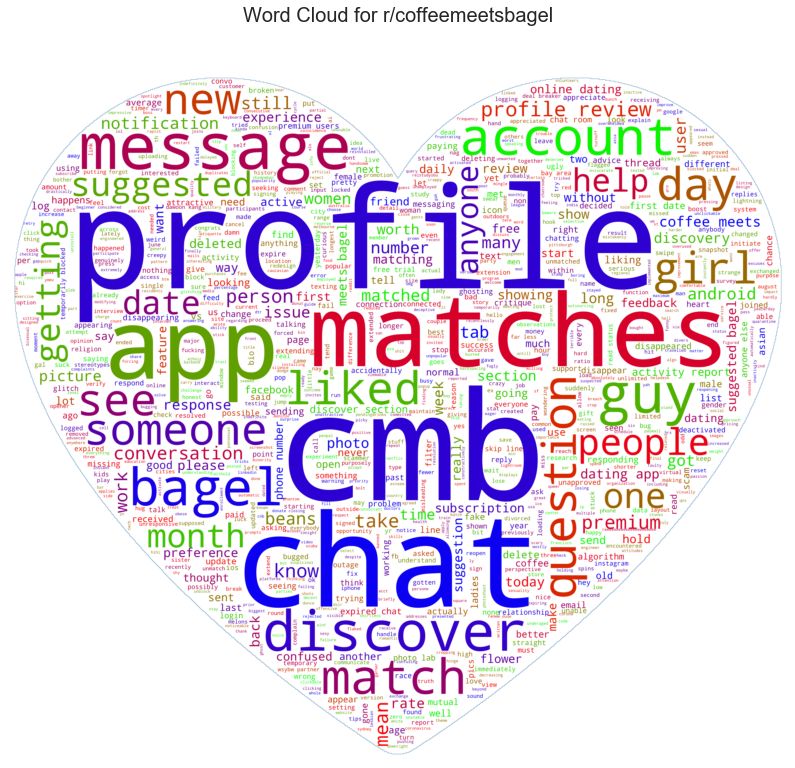

In [41]:
wordcloud(str(cmb_wordcloud_final),
    plot_title='Word Cloud for r/coffeemeetsbagel',
    mask_img = 'images/heart_mask.png')

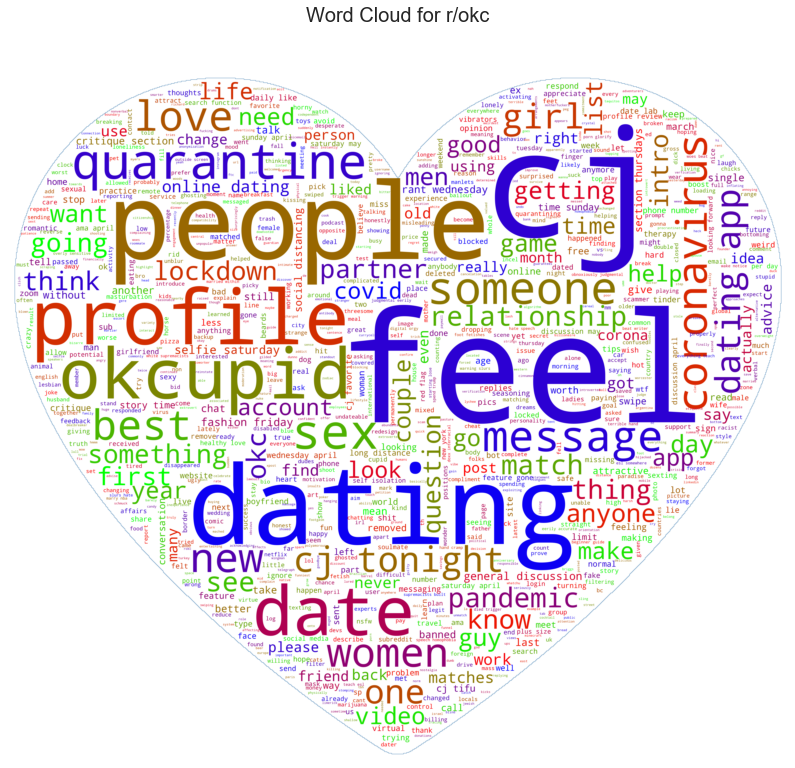

In [42]:
wordcloud(str(okc_wordcloud_final),
    plot_title='Word Cloud for r/okc',
    mask_img = 'images/heart_mask.png')

Comparing the wordclouds form CoffeeMeetsBagel (CMB) v.s. OkCupid (OKC), we are able to notice notice several differences. Key words that are commonly used in `r/coffeemeetsbagel` are:
- CMB
- Chat 
- Matches
- Profile 
- App

Commonly used words in `r/okc` which are:

- OkCupid
- Feel
- Dating
- People 

On a side note, the word 'cj' under `r/OkCupid` refers to a username who is an active user of the subreddit. Going forward, we will be dropping 'cj' as a word for our modelling. 


### Identifying Common Keywords in both Dating App Subreddits

In [43]:
# Instantiating vectorizer w/o stopwords
cvec = CountVectorizer(stop_words='english')
tvec = TfidfVectorizer(stop_words='english')

# Fit our vectorizer using our train data
cmb_cvec = cvec.fit(cmb_wordchunk)
cmb_tvec = tvec.fit(cmb_wordchunk)

# No. of features without stopwords
print('No. of features without stop words in CMB using CountVectorizer: {}'.format(len(cmb_cvec.get_feature_names())))
print('No. of features without stop words in CMB using TfidfVectorizer: {}'.format(len(cmb_tvec.get_feature_names())))

No. of features without stop words in CMB using CountVectorizer: 1348
No. of features without stop words in CMB using TfidfVectorizer: 1348


In [44]:
# Transforming using our fitted cvec.
# And converting the result to a DataFrame.
cmb_keywords_cvec = pd.DataFrame(cvec.transform(cmb_wordchunk).todense(),
                       columns=cmb_cvec.get_feature_names())
cmb_keywords_tvec = pd.DataFrame(tvec.transform(cmb_wordchunk).todense(),
                       columns=cmb_cvec.get_feature_names())

In [45]:
# Which words appear the most in CoffeeMeetsBagel using CountVectorizer ?
cmb_wordcount_cvec = cmb_keywords_cvec.sum(axis=0)
print("Most common words in r/coffeemeetsbagel")
cmb_wordcount_cvec.sort_values(ascending = False).head(20)

Most common words in r/coffeemeetsbagel


cmb          106
profile      100
matches       64
app           63
chat          61
discover      58
does          54
like          53
likes         43
account       42
just          40
match         39
suggested     37
bagels        35
guys          34
liked         34
review        33
dating        31
people        31
bagel         31
dtype: int64

In [46]:
# Which words is assigned the highest TFIDF Score CoffeeMeetsBagel using TfidfVectorizer?
# Note: The TFIDF Value is statistical measure used to evaluate how important a word is to a document in a corpus.
cmb_wordcount_tvec = cmb_keywords_tvec.sum(axis=0)
print("Most common words in r/coffeemeetsbagel")
cmb_wordcount_tvec.sort_values(ascending = False).head(20)

Most common words in r/coffeemeetsbagel


profile      32.143982
cmb          29.321901
matches      24.460251
discover     22.125650
chat         20.600047
app          20.513225
likes        17.650120
does         17.274045
review       16.104069
like         15.435757
account      14.877982
match        14.716640
suggested    14.691759
question     13.866490
guys         13.368407
bagels       12.765381
liked        11.896922
just         11.781035
messages     11.119047
people       10.902423
dtype: float64

In [47]:
# Instantiating vectorizer w/o stopwords
cvec = CountVectorizer(stop_words='english')
tvec = TfidfVectorizer(stop_words='english')

# Fit our vectorizer using our train data
okc_cvec = cvec.fit(okc_wordchunk)
okc_tvec = tvec.fit(okc_wordchunk)

# No. of features without stopwords
print('No. of features without stop words: {}'.format(len(okc_cvec.get_feature_names())))
print('No. of features without stop words: {}'.format(len(okc_tvec.get_feature_names())))

No. of features without stop words: 1715
No. of features without stop words: 1715


In [48]:
# Transforming using our fitted vectorizers and converting the result to a DataFrame.
okc_keywords_cvec = pd.DataFrame(cvec.transform(okc_wordchunk).todense(),
                       columns=okc_cvec.get_feature_names())
okc_keywords_tvec = pd.DataFrame(tvec.transform(okc_wordchunk).todense(),
                       columns=okc_tvec.get_feature_names())

In [49]:
# Dropping the word 'cj', a username of an active member of r/okcupid 
okc_keywords_cvec=okc_keywords_cvec.drop(columns = 'cj')
okc_keywords_tvec=okc_keywords_tvec.drop(columns = 'cj')

In [51]:
# Which words appear the most in CoffeeMeetsBagel?
okc_wordcount_cvec = okc_keywords_cvec.sum(axis=0)
print("Most common words in r/coffeemeetsbagel")
okc_wordcount_cvec.sort_values(ascending = False).head(20)

Most common words in r/coffeemeetsbagel


feel           101
dating          74
people          43
2020            41
like            39
okcupid         36
profile         36
quarantine      31
sex             30
date            30
doing           24
does            24
app             24
april           23
time            23
love            23
new             22
likes           22
coronavirus     22
tonight         21
dtype: int64

In [52]:
# Which words is assigned the highest TFIDF Score OkCupid using TfidfVectorizer?
# Note: The TFIDF Value is statistical measure used to evaluate how important a word is to a document in a corpus.
okc_wordcount_tvec = okc_keywords_tvec.sum(axis=0)
print("Most common words in r/coffeemeetsbagel")
okc_wordcount_tvec.sort_values(ascending = False).head(20)

Most common words in r/coffeemeetsbagel


feel          34.670865
dating        21.396963
profile       15.218084
2020          14.590519
doing         14.101800
people        13.814004
tonight       13.363743
like          12.058291
okcupid       11.719580
quarantine    11.433240
likes         10.447455
date           9.414843
sex            9.365133
april          8.907719
app            8.474037
love           8.200485
does           8.114042
match          8.095660
best           8.045265
new            7.806258
dtype: float64

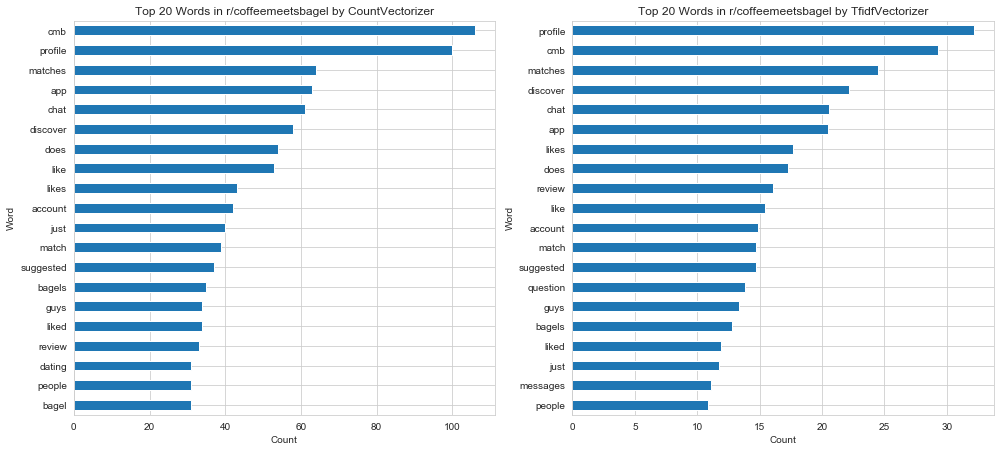

In [53]:
# Barplots for most common/important words in r/coffeemeetsbagel

plt.figure(figsize=(14,12), facecolor='white')

plt.subplot(2,2,1)
cmb_wordcount_cvec.sort_values().tail(20).plot(kind='barh')
plt.title('Top 20 Words in r/coffeemeetsbagel by CountVectorizer')
plt.xlabel('Count')
plt.ylabel('Word')

plt.subplot(2,2,2)
cmb_wordcount_tvec.sort_values().tail(20).plot(kind='barh')
plt.title('Top 20 Words in r/coffeemeetsbagel by TfidfVectorizer')
plt.xlabel('Count')
plt.ylabel('Word')

plt.tight_layout()

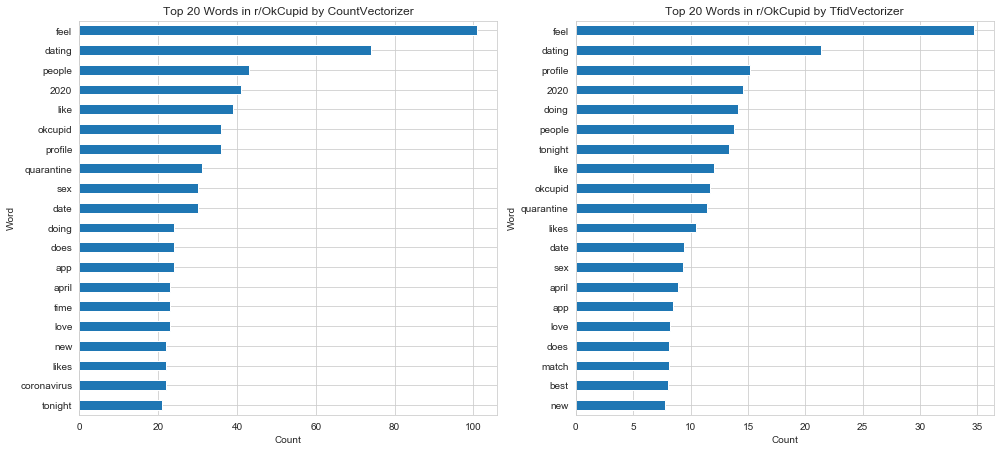

In [54]:
# Barplots for most common/important words in r/OkCupid

plt.figure(figsize=(14,12), facecolor='white')

plt.subplot(2,2,1)
okc_wordcount_cvec.sort_values().tail(20).plot(kind='barh')
plt.title('Top 20 Words in r/OkCupid by CountVectorizer')
plt.xlabel('Count')
plt.ylabel('Word')

plt.subplot(2,2,2)
okc_wordcount_tvec.sort_values().tail(20).plot(kind='barh')
plt.title('Top 20 Words in r/OkCupid by TfidVectorizer')
plt.xlabel('Count')
plt.ylabel('Word')

plt.tight_layout()

The barplots of CountVectorizer and TfidfVectorizer are juxtaposed against each other. As for both dating apps, the ranking for most of these words do not differ by much. However, some words which have not appeared in the rankings for CountVectorizer has appeared in Tf-idf instead (e.g. 'tonight' in r/OkCupid). These words may have more predictive power in classifying a post and maybe relevant to the nature of the post and the dating app itself. 

<a id='modelling'></a>
## 4. Modelling
---

#### Combining `cmb_df` and `okc_df` together 

In [94]:
frames = [cmb_df,okc_df]
full_df = pd.concat(frames)
full_df

,name,title,selftext,subreddit
0,t3_cth9ox,CMB Help Center,"For any questions about how the app works, ple...",coffeemeetsbagel
1,t3_gl88kp,28M Profile Review,"If you're interested in reviewing a profile, D...",coffeemeetsbagel
2,t3_gkzxeu,has anyone paid for premium and whats your exp...,i mean $35 a month is kinda $$$ for me but con...,coffeemeetsbagel
3,t3_gkt67t,How are matches supposed to work?,So I've been trying out the app for around a w...,coffeemeetsbagel
4,t3_gkma07,Only 1 suggested bagel each day!?,I've just returned to this app after a long hi...,coffeemeetsbagel
...,...,...,...,...
983,t3_gjswa8,activating back my old profile,reactivated my profile after 3 years and i sub...,OkCupid
984,t3_gjx06w,The 9 Best Remote-Control Vibrators for Long D...,,OkCupid
985,t3_gjwggb,My profile disappeared,My profile disappeared? I bought A-List and no...,OkCupid
986,t3_gju7sm,Sexting?,I went on one date with a girl before covid go...,OkCupid


In [95]:
# Checking No. of posts from each dating app subreddit 
full_df['subreddit'].value_counts()

OkCupid             988
coffeemeetsbagel    982
Name: subreddit, dtype: int64

In [96]:
# Converting subreddit types into binary values
# We assign CMB as 0, OKC as 1
full_df['subreddit'] = full_df['subreddit'].map(dict(coffeemeetsbagel=0, OkCupid=1))
full_df['subreddit'].value_counts()


1    988
0    982
Name: subreddit, dtype: int64

### Baseline Model

In [97]:
full_df['subreddit'].value_counts()

1    988
0    982
Name: subreddit, dtype: int64

In [98]:
# Baseline model score 

989/(982+989)

0.5017757483510908

### Initial Model: Multinomial NB with CountVectorizer

In [99]:
full_df ['combined_text'] = full_df ['title'] + ' ' + full_df ['selftext']
full_df.head()

,name,title,selftext,subreddit,combined_text
0,t3_cth9ox,CMB Help Center,"For any questions about how the app works, ple...",0,CMB Help Center For any questions about how th...
1,t3_gl88kp,28M Profile Review,"If you're interested in reviewing a profile, D...",0,28M Profile Review If you're interested in rev...
2,t3_gkzxeu,has anyone paid for premium and whats your exp...,i mean $35 a month is kinda $$$ for me but con...,0,has anyone paid for premium and whats your exp...
3,t3_gkt67t,How are matches supposed to work?,So I've been trying out the app for around a w...,0,How are matches supposed to work? So I've been...
4,t3_gkma07,Only 1 suggested bagel each day!?,I've just returned to this app after a long hi...,0,Only 1 suggested bagel each day!? I've just re...


In [100]:
X = full_df['combined_text']
y = full_df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y)

In [101]:
# Instantiate a CountVectorizer.
cvec = CountVectorizer(stop_words='english')

# Fitting the vectorizer on data
cvec.fit(X_train)

X_train = pd.DataFrame(cvec.transform(X_train).todense(),
                       columns=cvec.get_feature_names())


X_test = pd.DataFrame(cvec.transform(X_test).todense(),
                       columns=cvec.get_feature_names())

nb = MultinomialNB()
nb.fit(X_train,y_train)

print('Training Score: {}'.format(nb.score(X_train,y_train)))
print('Test Score: {}'.format(nb.score(X_test,y_test)))

pred = nb.predict(X_test)

# Confusion Matrix
conf_mat = confusion_matrix(y_test,pred)

pd.DataFrame(confusion_matrix(y_test, pred),
            columns=['Predicted CMB Post', 'Predicted OKC Post'],
            index=['Actual CMB Post', 'Actual OKC Post'])


Training Score: 0.9550398839738942
Test Score: 0.8460236886632826


,Predicted CMB Post,Predicted OKC Post
Actual CMB Post,282,13
Actual OKC Post,78,218


In [102]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print('Accuracy: {}'.format(round((tp+tn)/(tp+fp+tn+fn),4)))
print('Misclassification rate: {}'.format(round((fp+fn)/(tp+fp+tn+fn),4)))
print('Precision: {}'.format(round(tp/(tp+fp),4)))
print('Sensitivity: {}'.format(round(tp/(tp+fn),4)))
print('Specificity: {}'.format(round(tn/(tn+fp),4)))

Accuracy: 0.846
Misclassification rate: 0.154
Precision: 0.9437
Sensitivity: 0.7365
Specificity: 0.9559


Upon using just CountVectorizer and Naive Bayes multinominal model, we are able to achieve an 88% accuracy and a 95% precision. This shows that the initial model has done relatively well in classfying posts that are either CMB or OKC. 

### Formatting `full_df['combined_text']` by removing punctuation and lemmatizing 

In [103]:
# Removing Punctuation
full_df['combined_formatted'] = full_df['combined_text'].str.replace('[^\w\s]','')

In [104]:
# Converting text to lowercase
full_df['combined_formatted'] = full_df['combined_formatted'].map(lambda x: x.lower())

In [105]:
full_df.head()

,name,title,selftext,subreddit,combined_text,combined_formatted
0,t3_cth9ox,CMB Help Center,"For any questions about how the app works, ple...",0,CMB Help Center For any questions about how th...,cmb help center for any questions about how th...
1,t3_gl88kp,28M Profile Review,"If you're interested in reviewing a profile, D...",0,28M Profile Review If you're interested in rev...,28m profile review if youre interested in revi...
2,t3_gkzxeu,has anyone paid for premium and whats your exp...,i mean $35 a month is kinda $$$ for me but con...,0,has anyone paid for premium and whats your exp...,has anyone paid for premium and whats your exp...
3,t3_gkt67t,How are matches supposed to work?,So I've been trying out the app for around a w...,0,How are matches supposed to work? So I've been...,how are matches supposed to work so ive been t...
4,t3_gkma07,Only 1 suggested bagel each day!?,I've just returned to this app after a long hi...,0,Only 1 suggested bagel each day!? I've just re...,only 1 suggested bagel each day ive just retur...


#### Creating Lemmatize Function

In [106]:
# Import and instantiate tokenizers

import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [107]:
def lemmatize(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [108]:
full_df['combined_formatted'] = full_df['combined_formatted'].apply(lemmatize)

In [109]:
full_df.head()

,name,title,selftext,subreddit,combined_text,combined_formatted
0,t3_cth9ox,CMB Help Center,"For any questions about how the app works, ple...",0,CMB Help Center For any questions about how th...,"[cmb, help, center, for, any, question, about,..."
1,t3_gl88kp,28M Profile Review,"If you're interested in reviewing a profile, D...",0,28M Profile Review If you're interested in rev...,"[28m, profile, review, if, youre, interested, ..."
2,t3_gkzxeu,has anyone paid for premium and whats your exp...,i mean $35 a month is kinda $$$ for me but con...,0,has anyone paid for premium and whats your exp...,"[ha, anyone, paid, for, premium, and, whats, y..."
3,t3_gkt67t,How are matches supposed to work?,So I've been trying out the app for around a w...,0,How are matches supposed to work? So I've been...,"[how, are, match, supposed, to, work, so, ive,..."
4,t3_gkma07,Only 1 suggested bagel each day!?,I've just returned to this app after a long hi...,0,Only 1 suggested bagel each day!? I've just re...,"[only, 1, suggested, bagel, each, day, ive, ju..."


In [110]:
# Join words in list into a string 
full_df['combined_formatted'] = full_df['combined_formatted'].apply(' '.join)

In [111]:
full_df.head()

,name,title,selftext,subreddit,combined_text,combined_formatted
0,t3_cth9ox,CMB Help Center,"For any questions about how the app works, ple...",0,CMB Help Center For any questions about how th...,cmb help center for any question about how the...
1,t3_gl88kp,28M Profile Review,"If you're interested in reviewing a profile, D...",0,28M Profile Review If you're interested in rev...,28m profile review if youre interested in revi...
2,t3_gkzxeu,has anyone paid for premium and whats your exp...,i mean $35 a month is kinda $$$ for me but con...,0,has anyone paid for premium and whats your exp...,ha anyone paid for premium and whats your expe...
3,t3_gkt67t,How are matches supposed to work?,So I've been trying out the app for around a w...,0,How are matches supposed to work? So I've been...,how are match supposed to work so ive been try...
4,t3_gkma07,Only 1 suggested bagel each day!?,I've just returned to this app after a long hi...,0,Only 1 suggested bagel each day!? I've just re...,only 1 suggested bagel each day ive just retur...


### Multinomial Naive Bayes Model against formatted/lemmatized text data

In [112]:
X = full_df['combined_formatted']
y = full_df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y)

In [113]:
# Instantiate a CountVectorizer.
cvec = CountVectorizer(stop_words='english')

# Fitting the vectorizer on data
cvec.fit(X_train)

X_train = pd.DataFrame(cvec.transform(X_train).todense(),
                       columns=cvec.get_feature_names())


X_test = pd.DataFrame(cvec.transform(X_test).todense(),
                       columns=cvec.get_feature_names())

nb = MultinomialNB()
nb.fit(X_train,y_train)

print('Training Score: {}'.format(round(nb.score(X_train,y_train),4)))
print('Test Score: {}'.format(round(nb.score(X_test,y_test),4)))

pred = nb.predict(X_test)

# Confusion Matrix
conf_mat = confusion_matrix(y_test,pred)

pd.DataFrame(confusion_matrix(y_test, pred),
            columns=['Predicted CMB Post', 'Predicted OKC Post'],
            index=['Actual CMB Post', 'Actual OKC Post'])



Training Score: 0.9543
Test Score: 0.846


,Predicted CMB Post,Predicted OKC Post
Actual CMB Post,284,11
Actual OKC Post,80,216


In [114]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print('Accuracy: {}'.format(round((tp+tn)/(tp+fp+tn+fn),4)))
print('Misclassification rate: {}'.format(round((fp+fn)/(tp+fp+tn+fn),4)))
print('Precision: {}'.format(round(tp/(tp+fp),4)))
print('Sensitivity: {}'.format(round(tp/(tp+fn),4)))
print('Specificity: {}'.format(round(tn/(tn+fp),4)))

Accuracy: 0.846
Misclassification rate: 0.154
Precision: 0.9515
Sensitivity: 0.7297
Specificity: 0.9627


Comparing the model performances between the two models, There is little noticeable difference between the inital model and the newer model, when `X = full_df['combined_formatted']` instead. In this case, lemmatization only had a slight effect on the model. However going forward, we will still stick to using the lemmatized text. 

### Multinomial Naive Bayes Model using TfidfVectorizer

In [115]:
X = full_df['combined_formatted']
y = full_df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y)

In [116]:
# Instantiate a TfidfVectorizer.
tvec = TfidfVectorizer(stop_words='english')

# Fitting the vectorizer on data
tvec.fit(X_train)

X_train = pd.DataFrame(tvec.transform(X_train).todense(),
                       columns=tvec.get_feature_names())


X_test = pd.DataFrame(tvec.transform(X_test).todense(),
                       columns=tvec.get_feature_names())

nb = MultinomialNB()
nb.fit(X_train,y_train)

print('Training Score: {}'.format(round(nb.score(X_train,y_train),4)))
print('Test Score: {}'.format(round(nb.score(X_test,y_test),4)))

pred = nb.predict(X_test)

# Confusion Matrix
conf_mat = confusion_matrix(y_test,pred)

pd.DataFrame(confusion_matrix(y_test, pred),
            columns=['Predicted CMB Post', 'Predicted OKC Post'],
            index=['Actual CMB Post', 'Actual OKC Post'])


Training Score: 0.9057
Test Score: 0.7953


,Predicted CMB Post,Predicted OKC Post
Actual CMB Post,288,7
Actual OKC Post,114,182


In [117]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print('Accuracy: {}'.format(round((tp+tn)/(tp+fp+tn+fn),4)))
print('Misclassification rate: {}'.format(round((fp+fn)/(tp+fp+tn+fn),4)))
print('Precision: {}'.format(round(tp/(tp+fp),4)))
print('Sensitivity: {}'.format(round(tp/(tp+fn),4)))
print('Specificity: {}'.format(round(tn/(tn+fp),4)))

Accuracy: 0.7953
Misclassification rate: 0.2047
Precision: 0.963
Sensitivity: 0.6149
Specificity: 0.9763


With CountVectorizer:

- Training Score: 0.9514
- Test Score: 0.8851
- Accuracy: 0.8851
- Misclassification rate: 0.1149
- Precision: 0.9562
- Sensitivity: 0.8081
- Specificity: 0.9627


With TfidfVectorizer:

- Training Score: 0.9094
- Test Score: 0.8243
- Accuracy: 0.8243
- Misclassification rate: 0.1757
- Precision: 0.9531
- Sensitivity: 0.6835
- Specificity: 0.9661


Using TfidfVectorizer with Mulitnomial NB seems to result in a worse performance when compared to CountVectorizer. Reasons to explain this could be that the frequency of words appearing in documents may seem to be a better predictor versus the weighted relevance of the word. 

### Logistic Regression Model

In [139]:
X = full_df['combined_formatted']
y = full_df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y)

#### With CountVectorizer

In [140]:
logr = make_pipeline(
    CountVectorizer(stop_words='english'),
    LogisticRegression(solver='lbfgs')
)
cv_scores = cross_val_score(logr, X_train, y_train, cv=5, scoring='roc_auc')
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)
print('Logistic regression model')
print('Training score: {}'.format(round(cv_scores.mean(), 4)))
print('Test score: {}'.format(round(roc_auc_score(y_test, y_pred), 4)))

# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)

pd.DataFrame(confusion_matrix(y_test, y_pred),
            columns=['Predicted CMB Post', 'Predicted OKC Post'],
            index=['Actual CMB Post', 'Actual OKC Post'])


Logistic regression model
Training score: 0.9396
Test score: 0.8747


,Predicted CMB Post,Predicted OKC Post
Actual CMB Post,243,52
Actual OKC Post,22,274


In [141]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('Accuracy: {}'.format(round((tp+tn)/(tp+fp+tn+fn),4)))
print('Misclassification rate: {}'.format(round((fp+fn)/(tp+fp+tn+fn),4)))
print('Precision: {}'.format(round(tp/(tp+fp),4)))
print('Sensitivity: {}'.format(round(tp/(tp+fn),4)))
print('Specificity: {}'.format(round(tn/(tn+fp),4)))

Accuracy: 0.8748
Misclassification rate: 0.1252
Precision: 0.8405
Sensitivity: 0.9257
Specificity: 0.8237


Multinomial Naive Bias Classifier
- Training Score: 0.9543
- Test Score: 0.8834

Logistic regression model
- Train score: 0.9354
- Test score 0.8765

When comparing the Multinomial Naive Bias Classifier against the Logistic Regression Model, the Logistic Regression Model seems to perform worse off. This suggests that the Multinomial Naive Bias Classifier is a better model than that of logistic regression. 

#### With TfidfVectorizer

In [142]:
X = full_df['combined_formatted']
y = full_df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y)

In [143]:
logr = make_pipeline(
    TfidfVectorizer(stop_words='english'),
    LogisticRegression(solver='lbfgs')
)
cv_scores = cross_val_score(logr, X_train, y_train, cv=5, scoring='roc_auc')
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)
print('Logistic regression model')
print('Training score: {}'.format(round(cv_scores.mean(), 4)))
print('Test score: {}'.format(round(roc_auc_score(y_test, y_pred), 4)))

# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)

pd.DataFrame(confusion_matrix(y_test, y_pred),
            columns=['Predicted CMB Post', 'Predicted OKC Post'],
            index=['Actual CMB Post', 'Actual OKC Post'])


Logistic regression model
Training score: 0.9392
Test score: 0.8748


,Predicted CMB Post,Predicted OKC Post
Actual CMB Post,258,37
Actual OKC Post,37,259


In [144]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('Accuracy: {}'.format(round((tp+tn)/(tp+fp+tn+fn),4)))
print('Misclassification rate: {}'.format(round((fp+fn)/(tp+fp+tn+fn),4)))
print('Precision: {}'.format(round(tp/(tp+fp),4)))
print('Sensitivity: {}'.format(round(tp/(tp+fn),4)))
print('Specificity: {}'.format(round(tn/(tn+fp),4)))

Accuracy: 0.8748
Misclassification rate: 0.1252
Precision: 0.875
Sensitivity: 0.875
Specificity: 0.8746


The logistic regression model using TfidfVectorizer has performed slightly better than CountVectorizer in regards to test scores. 



### Determining best parameters using GridSearchCV

Out of the four different models (i.e. Multi NB - cvec, Multi NB - tvec, Log R - cvec, Log R - tvec), the MultiNomial NB Classifier based on CountVetorizer has performed the best out of the four ( Training Score: 0.9514, Test Score: 0.8851). 
Thus, we would like to narrow down on this model and determine what are the best parameters for this model using GridSearchCV.

In [145]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('mnb', MultinomialNB())
])


In [146]:
pipe.get_params()

{'memory': None,
 'steps': [('cvec',
   CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                   dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                   lowercase=True, max_df=1.0, max_features=None, min_df=1,
                   ngram_range=(1, 1), preprocessor=None, stop_words=None,
                   strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                   tokenizer=None, vocabulary=None)),
  ('mnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
 'verbose': False,
 'cvec': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                 dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                 lowercase=True, max_df=1.0, max_features=None, min_df=1,
                 ngram_range=(1, 1), preprocessor=None, stop_words=None,
                 strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                 tokenizer=None, vocabulary=None),
 'mnb':

In [147]:
params = dict(
    cvec__stop_words = [None, 'english'],
    cvec__max_df = (0.5, 0.75, 1.0),
    cvec__ngram_range = [(1, 1), (2, 2)],
    mnb__alpha= np.linspace(0,1,num=11)
)

gs = GridSearchCV(pipe, params, cv=5, scoring='roc_auc', iid=False, n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)
print("Best params: {}".format(gs.best_params_))
print('Training score: {}'.format(round(gs.best_score_, 4)))
print('Test score {}'.format(round(gs.best_estimator_.score(X_test, y_test), 4)))

# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)

pd.DataFrame(confusion_matrix(y_test, pred),
            columns=['Predicted CMB Post', 'Predicted OKC Post'],
            index=['Actual CMB Post', 'Actual OKC Post'])


Fitting 5 folds for each of 132 candidates, totalling 660 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   17.9s


Best params: {'cvec__max_df': 0.5, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': 'english', 'mnb__alpha': 0.7000000000000001}
Training score: 0.9432
Test score 0.8477


[Parallel(n_jobs=-1)]: Done 660 out of 660 | elapsed:   26.1s finished


,Predicted CMB Post,Predicted OKC Post
Actual CMB Post,288,7
Actual OKC Post,114,182


In [148]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('Accuracy: {}'.format(round((tp+tn)/(tp+fp+tn+fn),4)))
print('Misclassification rate: {}'.format(round((fp+fn)/(tp+fp+tn+fn),4)))
print('Precision: {}'.format(round(tp/(tp+fp),4)))
print('Sensitivity: {}'.format(round(tp/(tp+fn),4)))
print('Specificity: {}'.format(round(tn/(tn+fp),4)))

Accuracy: 0.8748
Misclassification rate: 0.1252
Precision: 0.875
Sensitivity: 0.875
Specificity: 0.8746


<a id='conclusion'></a>
## 5. Conclusion

### Summary

Even though CMB and OKC are similar with their purpose as a dating app, they are different in terms of the way matchmaking is done. To provide a rough context, CMB sends its male counterparts ( a.k.a coffee) 21 profiles of females (a.k.a bagels) per day, which is a fairly limited amount compared to other apps. As for OKC, males and females are able to view each other's profile freely and it is unlimited. 

CMB's subreddit most used words seem to be focused on the subject of profile and matches. A good reason for this would be that since CMB has limited the number of profile views for guys per day, a huge concern for the CMB community would be placed on creating quality profiles and getting quality matches. A dominant issue in the dating app industry is that some people use dating apps only for casual relationships, while others might be seeking more serious relationships. According to an article from techcrunch.com, CMB "puts more emphasis on user profiles", since you only have a limited number of matches per day, it encourages the user to glean more information on the other person before coming to a decision. This is very unlike other dating apps like Tinder, where people would accept or reject a profile mostly based on the profile picture. 

As for OkCupid, words like "feel" and "dating" are more prominent. Just from glancing through the nature of the subreddit contents in OKC, alot of these posts are more focused on their dating experiences with their counterpart, once they have matched in OKC. "Profile" is also ranked quite highly as OkCupid also places emphasis for users to create a profile representative of themselves.

The models generated have managed to obtain a high rate of accuracy in classifying the posts. This shows that the vectorizers such as Count and TF-IDF have done well in filtering out keywords that are peculiar for the dating app. In summary, CMB users seem to be having more focused discussions on profiling and matching, while OkCupid users are more focused on sharing their dating experiences in the reddit forums. 


### Limitations

From the word cloud rankings, we notice that OkCupid has words like '2020','quarantine', 'coronavirus' and 'april'. These words refer to the current period we are in, and the coronavirus is a worldwide pandemic that is currently happening in April 2020. Since the web-scraped search results were taken from the latest subreddit posts, OkCupid has many more posts mentioning current events like the coronarvirus and quarantine situations, whereas for CMB, there was lesser mention of these current events. 

What we can possibly infer from this information is that OkCupid's subreddit has a much more active userbase than CMB. As a matter of fact, OkCupid has about 200,000 members, whereas CMB has only 7,300 members up to date. With a more active base on OkCupid than CMB, getting new information on trends based on the CMB's subreddits maybe be comparatively slower than OkCupid. 

### Recommendations 

These types of information are very telling in identifying the unique selling points (USP) of the different dating apps, as well as to monitor the perceptions from the netizens about these dating apps. CMB focuses more on quality matches for both partners, leading to serious relationships. OkCupid might be more focused on the experience of using the app for dates itself. For our clients, Venus Dating, they would want to take these different USPs into consideration and create a selling proposition that will allow them to penetrate the already saturated dating app market.

More research can be definitely conducted on reviews of the app itself on platforms such as Apple Store and Google Play, where users will usually rate the app out of a given score of 5, and leave any remarks about their satisfaction of the product. It may be also useful to glean on data written on blog reviews, as these platforms tend to be much more verbal and thought out than a passing comment in reddit or an online app store. 

Sources:  
https://techcrunch.com/2018/12/11/coffee-meets-bagel-goes-anti-tinder-with-a-redesign-focused-on-profiles-conversations/